# Exercise 3
Redes libres de escala y ataques a redes 

In [3]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import math as math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Redes libres de escala.

Generar una red libre de escala con 10000 edges y que añade 10 nodos en cada
paso (utilizad la rutina barabasi_albert_graph(n, m)). Calculad los valores de L,
C y la distribución de grado de los nodos. Generad una red aleatoria que tenga
el mismo número de nodos y ramas que la red que habéis creado, calculad sus
valores de L, C y la distribución del grado de los nodos y comparad los valores
obtenidos.

### L & C

In [4]:
def get_graph_metrics(graph):
    largest_cc = max(nx.connected_components(graph), key=len)   
    largest_connected_subgraph = graph.subgraph(largest_cc)
    if not nx.is_connected(graph): 
        subgraph = largest_connected_subgraph
    else:
        subgraph = graph
    return nx.average_clustering(graph),\
           nx.average_shortest_path_length(subgraph),\
           largest_connected_subgraph.order()
    
def l_c_random(n_graph, n, p):
    acum_c = 0
    acum_l = 0
    acum_o = 0
    for i in range(0, n_graph - 1):
        graph = nx.gnp_random_graph(n, p)
        c, l, o = get_graph_metrics(graph)
        acum_c += c
        acum_l += l
        acum_o += o
    return [acum_c/n_graph, acum_l/n_graph, acum_o/n_graph]

In [5]:
order = 10000
edges = 10
graph_free_scale_barabasi = nx.barabasi_albert_graph(order, edges)
c, l, o = get_graph_metrics(graph_free_scale_barabasi)

In [6]:
print(c, l, o)
# Result : 0.011121720734477772 3.0628272427242726 10000

0.011121720734477772 3.0628272427242726 10000


In [7]:
print("Free scale graph size:", graph_free_scale_barabasi.size())
graph_random = nx.gnm_random_graph(order, graph_free_scale_barabasi.size())
c_random, l_random, o_random = get_graph_metrics(graph_random)

d = {'Free Scale': [c, l], 'Random': [c_random, l_random]}
df = pd.DataFrame(data=d, index = ['Average clustering',
                                   'Average shortest path length'])
df

Free scale graph size: 99900


,Free Scale,Random
Average clustering,0.011122,0.002034
Average shortest path length,3.062827,3.403509


### Node degree distribution

Plot by curves.

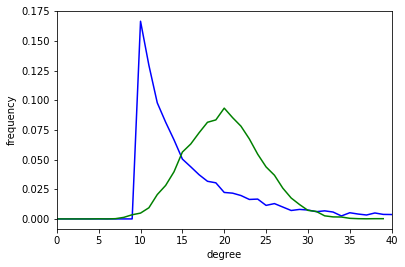

In [14]:
plt.xlabel('degree')
plt.ylabel('frequency')
plt.xlim(0, 40)

his = nx.degree_histogram(graph_free_scale_barabasi)
plt.plot([i/order for i in his], color='g')
his_al = nx.degree_histogram(graph_random)
plt.plot([i/order for i in his_al], color='b');


Another plot

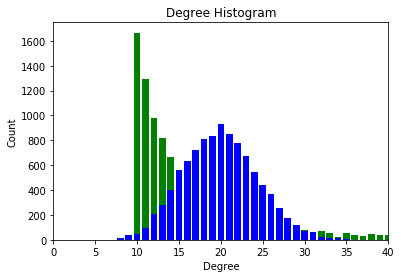

In [18]:
# Another way
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xlim(0, 40)
L = nx.degree_histogram(graph_free_scale_barabasi)
plt.bar(range(len(L)),L, width=0.80, color='g')
L = nx.degree_histogram(graph_random)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.show()

### Results Comparison

## Ataque a una red. 

### Ataque aleatorio

Implementar una rutina programa ataque_aleatorio(G,m) en Python que
realice un ataque aleatorio a m nodos del grafo G.
Utilizad la rutina anterior para calcular el tamaño de la mayor componente
conexa en grafos aleatorios, de mundo pequeño y libres de escala de 1000
nodos y 4000 ramas tras ataques de 10%, 30%, 50%, 70% y 90% de los nodos
del grafo.

### Ataque grados

Implementar una rutina programa ataque_grados(G,m) en Python que realice
un ataque basado en grados a m nodos del grafo G.
Utilizad la rutina anterior para calcular el tamaño de la mayor componente
conexa en grafos aleatorios, de mundo pequeño y libres de escala de 1000
nodos y 4000 ramas tras ataques de 10%, 30%, 50%, 70% y 90% de los nodos.

### Comparaciones
Comparar el resultado obtenido en los dos apartados anteriores. 